# RANDOM FOREST

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_excel('glass.xlsx', sheet_name=0)

In [3]:
data2 = pd.read_excel('glass.xlsx', sheet_name=1)

In [4]:
data = data2.copy()

In [5]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [6]:
data.shape

(214, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

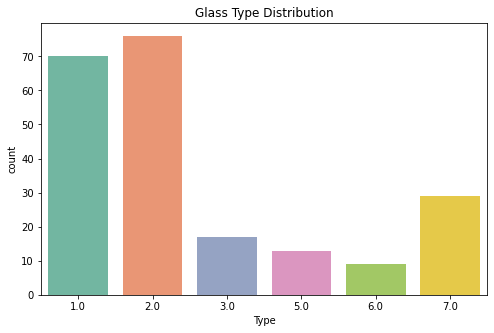

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='Type', data=data, palette='Set2')
plt.title('Glass Type Distribution')
plt.show()

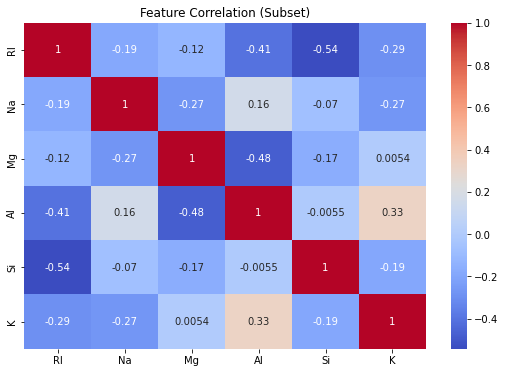

In [50]:
plt.figure(figsize=(9,6))
sns.heatmap(data.corr().iloc[:6, :6], annot=True, cmap='coolwarm')
plt.title('Feature Correlation (Subset)')
plt.show()

In [13]:
data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

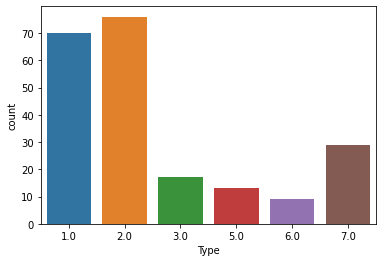

In [14]:
sns.countplot(x='Type', data=data)
plt.show()

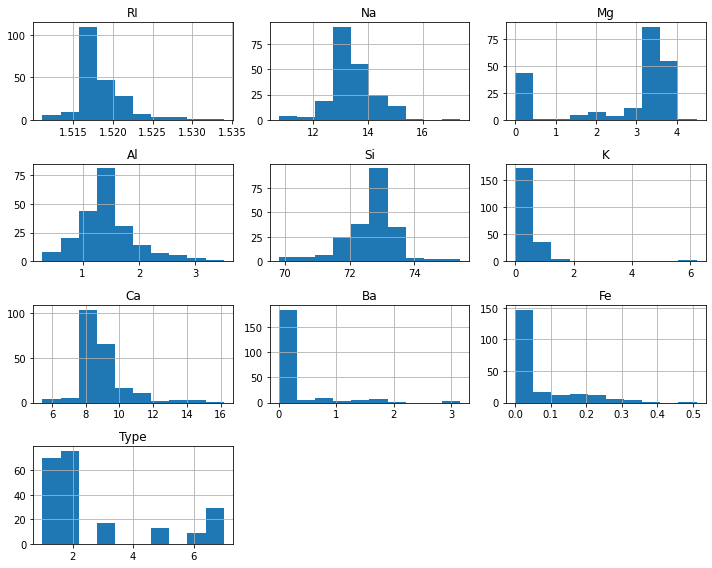

In [16]:
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

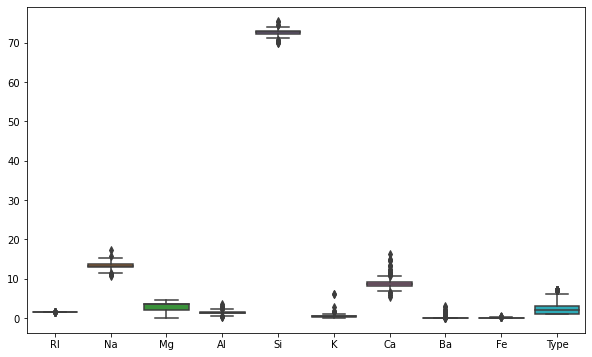

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = data.drop('Type', axis=1)
y = data['Type']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((149, 9), (65, 9))

In [22]:
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)

In [24]:
X_test = sc.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(random_state=42)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [34]:
acc = accuracy_score(y_test, y_pred)

In [35]:
pre = precision_score(y_test, y_pred, average='weighted')

In [36]:
rec = recall_score(y_test, y_pred, average='weighted')

In [37]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [38]:
acc, pre, rec, f1

(0.7692307692307693,
 0.7661700618222356,
 0.7692307692307693,
 0.7601294829201807)

In [39]:
print(confusion_matrix(y_test, y_pred))

[[17  2  0  0  0  0]
 [ 4 15  1  1  1  1]
 [ 2  0  2  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.89      0.81        19
         2.0       0.75      0.65      0.70        23
         3.0       0.67      0.50      0.57         4
         5.0       0.75      0.50      0.60         6
         6.0       0.75      1.00      0.86         3
         7.0       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
bag = BaggingClassifier(RandomForestClassifier(), n_estimators=10, random_state=42)
bag.fit(X_train, y_train)
y_bag = bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_bag)
acc_bag

0.7692307692307693

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
adb = AdaBoostClassifier(n_estimators=50, random_state=42)
adb.fit(X_train, y_train)
y_adb = adb.predict(X_test)
acc_adb = accuracy_score(y_test, y_adb)
acc_adb

0.5076923076923077

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_gb)
acc_gb

0.8153846153846154

In [47]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [acc, acc_bag, acc_adb, acc_gb]
})
results

,Model,Accuracy
0,Random Forest,0.769231
1,Bagging,0.769231
2,AdaBoost,0.507692
3,Gradient Boosting,0.815385


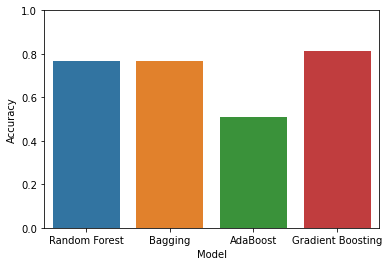

In [48]:
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0,1)
plt.show()